In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'Clean_SBA_Loan.csv')
df.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,sector,isFranchise,sameState,Portion
0,1997,84,4,2,0,0,0,N,Y,60000.0,P I F,60000.0,48000.0,Retail trade,No Franchise,0,0.80
1,1997,60,2,2,0,0,0,N,Y,40000.0,P I F,40000.0,32000.0,Accommodation food_serv,No Franchise,1,0.80
2,1997,180,7,1,0,0,0,N,N,287000.0,P I F,287000.0,215250.0,"Health_care,social_ass",No Franchise,1,0.75
3,1997,120,19,1,0,0,0,N,N,517000.0,P I F,517000.0,387750.0,Manufacturing,No Franchise,0,0.75
4,1997,84,1,2,0,0,0,N,Y,45000.0,P I F,45000.0,36000.0,Other_no_pub,No Franchise,0,0.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459506 entries, 0 to 459505
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ApprovalFY         459506 non-null  int64  
 1   Term               459506 non-null  int64  
 2   NoEmp              459506 non-null  int64  
 3   NewExist           459506 non-null  int64  
 4   CreateJob          459506 non-null  int64  
 5   RetainedJob        459506 non-null  int64  
 6   UrbanRural         459506 non-null  int64  
 7   RevLineCr          459506 non-null  object 
 8   LowDoc             459506 non-null  object 
 9   DisbursementGross  459506 non-null  float64
 10  MIS_Status         459506 non-null  object 
 11  GrAppv             459506 non-null  float64
 12  SBA_Appv           459506 non-null  float64
 13  sector             459506 non-null  object 
 14  isFranchise        459506 non-null  object 
 15  sameState          459506 non-null  int64  
 16  Po

In [4]:
## Checking for missing value
df.isnull().sum()

ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
SBA_Appv             0
sector               0
isFranchise          0
sameState            0
Portion              0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApprovalFY,459506.0,2003.016381,5.667214,1984.00,2000.0,2005.0,2007.00,2014.0
Term,459506.0,93.719986,68.305137,0.00,59.0,84.0,90.00,527.0
NoEmp,459506.0,9.893912,56.664519,0.00,2.0,4.0,9.00,9999.0
NewExist,459506.0,1.264884,0.441272,1.00,1.0,1.0,2.00,2.0
CreateJob,459506.0,1.905098,16.910585,0.00,0.0,0.0,1.00,5621.0
RetainedJob,459506.0,4.786976,15.685655,0.00,0.0,1.0,5.00,4441.0
UrbanRural,459506.0,0.900169,0.604199,0.00,1.0,1.0,1.00,2.0
DisbursementGross,459506.0,171965.924027,274989.012959,4000.00,34983.0,75500.0,191992.75,11446325.0
GrAppv,459506.0,154066.817809,261217.184151,1000.00,25000.0,50000.0,156000.00,5000000.0
SBA_Appv,459506.0,117096.220844,214163.395536,500.00,12750.0,35000.0,125000.00,4500000.0


In [6]:
df.describe(include='O').T

,count,unique,top,freq
RevLineCr,459506,2,N,265983
LowDoc,459506,2,N,434364
MIS_Status,459506,2,P I F,360960
sector,459506,20,Retail trade,81344
isFranchise,459506,2,No Franchise,445170


In [7]:
SBA_LoanDESC = []

for i in df.columns:
    SBA_LoanDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=SBA_LoanDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,ApprovalFY,int64,0,0.0,29,"[2005, 2012]"
1,Term,int64,0,0.0,373,"[324, 254]"
2,NoEmp,int64,0,0.0,432,"[71, 74]"
3,NewExist,int64,0,0.0,2,"[1, 2]"
4,CreateJob,int64,0,0.0,193,"[144, 180]"
5,RetainedJob,int64,0,0.0,276,"[86, 75]"
6,UrbanRural,int64,0,0.0,3,"[2, 0]"
7,RevLineCr,object,0,0.0,2,"[N, Y]"
8,LowDoc,object,0,0.0,2,"[N, Y]"
9,DisbursementGross,float64,0,0.0,101013,"[36579.0, 172912.0]"


### Data Analyst and Visualization

### `MIS_Status`

In [8]:
# This code aim to show the frequency of MIS_Status
df.stb.freq(['MIS_Status'])

,MIS_Status,count,percent,cumulative_count,cumulative_percent
0,P I F,360960,78.553925,360960,78.553925
1,CHGOFF,98546,21.446075,459506,100.000000


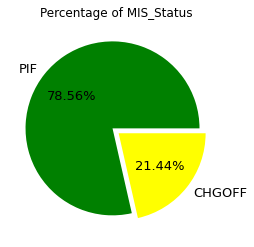

In [9]:
#Here are visualization of MIS_Status using pie chart
percentage = [78.55, 21.44]
label = ['PIF', 'CHGOFF']

plt.pie( percentage, labels=label,
        colors=[ 'green', 'yellow'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.2f%%',
        radius=1,
        explode=(.05, .04)
)
plt.title('Percentage of MIS_Status')
# plt.savefig('D:\\PURWADHIKA\\MODUL 03\\PICTURES\\Response_Percent.png')
plt.show()

- Percentage of borrower who pain in full (PIF) around 78.56% while borrower who charge off around 21.44%

### `Term`

In [10]:
df['Term'].describe()

count    459506.000000
mean         93.719986
std          68.305137
min           0.000000
25%          59.000000
50%          84.000000
75%          90.000000
max         527.000000
Name: Term, dtype: float64

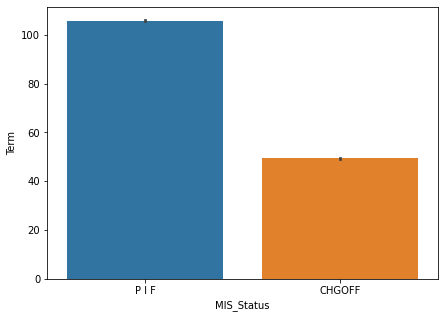

In [11]:
plt.figure(figsize=(7,5))
sns.barplot(y = df['Term'], x=df['MIS_Status'])
plt.show()

In [12]:
df['Term'].groupby(df['MIS_Status']).median()

MIS_Status
CHGOFF    46
P I F     84
Name: Term, dtype: int64

- Median Paid in Full (PIF) around 84 month higher rather than CHGOFF 

### `NoEmp`

In [13]:
df['NoEmp'].describe()

count    459506.000000
mean          9.893912
std          56.664519
min           0.000000
25%           2.000000
50%           4.000000
75%           9.000000
max        9999.000000
Name: NoEmp, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

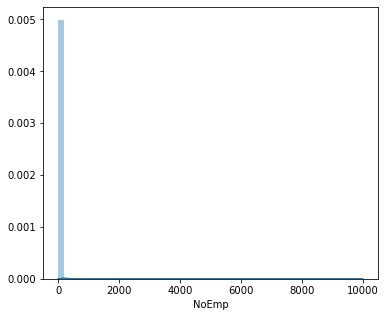

In [14]:
plt.figure(figsize=(6,5))
sns.distplot(df['NoEmp'])
plt.show

#right skewes

In [15]:
df['NoEmp'].groupby(df['MIS_Status']).median()

MIS_Status
CHGOFF    3
P I F     4
Name: NoEmp, dtype: int64

- NoEmp is right skewed
- Median number of employees of CHGOFF was less than PIF. This is could be indicate that small business with little employees has more risk to charge off

### `NewExist`

In [16]:
df.stb.freq(['NewExist'])

,NewExist,count,percent,cumulative_count,cumulative_percent
0,1,337790,73.511554,337790,73.511554
1,2,121716,26.488446,459506,100.000000


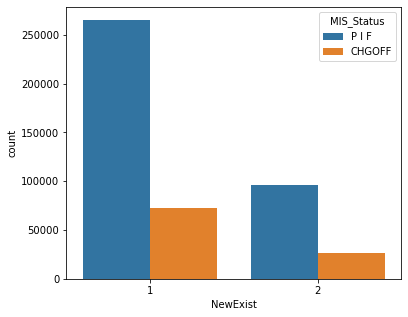

In [17]:
plt.figure(figsize=(6,5))
sns.countplot(df['NewExist'], hue=df['MIS_Status'])
plt.show()

In [18]:
((pd.crosstab(index=df['NewExist'], columns=df['MIS_Status'], normalize='index', margins=True))*100).round(2)

MIS_Status,CHGOFF,P I F
NewExist,,
1,21.46,78.54
2,21.41,78.59
All,21.45,78.55


- Whether the business was Existing Business or New Bussiness, both of them has same risk of CHGOFF

### `UrbanRural`

In [19]:
#sidetable
df.stb.freq(['UrbanRural'])
#This code aims to find out the percentage of UrbanRural
#It appears that Urban have a high percentage around 62.49% compared to others

,UrbanRural,count,percent,cumulative_count,cumulative_percent
0,1,287181,62.497769,287181,62.497769
1,0,109099,23.742671,396280,86.240441
2,2,63226,13.759559,459506,100.000000


In [20]:
((pd.crosstab(index=df['MIS_Status'], columns=df['UrbanRural'], normalize='index', margins=True))*100).round(2)

## This code aim to know ==> most of the defaults loan come from what area ? 

UrbanRural,0,1,2
MIS_Status,,,
CHGOFF,4.87,81.86,13.28
P I F,28.90,57.21,13.89
All,23.74,62.50,13.76


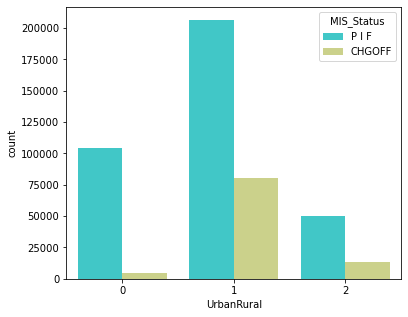

In [21]:
# Visualization 
plt.figure(figsize=(6,5))
sns.countplot(df['UrbanRural'], hue=df['MIS_Status'], palette='rainbow')
plt.show()

- Most of CHGOFF come from Urban with percentage 81.86%

### `RevLineCr`

In [22]:
#sidetable
df.stb.freq(['RevLineCr'])
#This code aims to find out the percentage of RevLineCr
#It appears that mostly small business dont revolving line of credit with percentage around 57.88%

,RevLineCr,count,percent,cumulative_count,cumulative_percent
0,N,265983,57.884554,265983,57.884554
1,Y,193523,42.115446,459506,100.000000


In [23]:
((pd.crosstab(index=df['MIS_Status'], columns=df['RevLineCr'], normalize='index', margins=True))*100).round(2)

## This code aim to know ==> is small business with revolving line credit (Y) has higher risk of default?

RevLineCr,N,Y
MIS_Status,,
CHGOFF,49.02,50.98
P I F,60.31,39.69
All,57.88,42.12


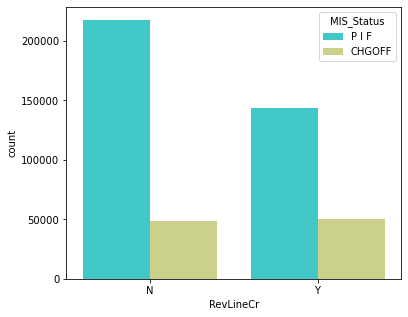

In [24]:
# Visualization 
plt.figure(figsize=(6,5))
sns.countplot(df['RevLineCr'], hue=df['MIS_Status'], palette='rainbow')
plt.show()

- Small busines with revolving line of credit has higher risk of default loan with percentage 50.98%

### `LowDoc`

In [25]:
#sidetable
df.stb.freq(['LowDoc'])
#This code aims to find out the percentage of RevLineCr
#It appears that mostly small business dont revolving line of credit with percentage around 57.88%

,LowDoc,count,percent,cumulative_count,cumulative_percent
0,N,434364,94.528472,434364,94.528472
1,Y,25142,5.471528,459506,100.000000


In [26]:
((pd.crosstab(index=df['MIS_Status'], columns=df['LowDoc'], normalize='index', margins=True))*100).round(2)

## This code aim to know ==> is LowDoc feature could be indicate as default risk?

LowDoc,N,Y
MIS_Status,,
CHGOFF,98.75,1.25
P I F,93.38,6.62
All,94.53,5.47


In [27]:
#This code aim to make a DataFrame to visualize
doc = {
    'Yes_Percent' : [1.25, 6.62],
    'No_Percent' : [98.75, 93.38],
    'Status':['CHGOFF', 'PIF']
}


pd.DataFrame(data=doc)

,Yes_Percent,No_Percent,Status
0,1.25,98.75,CHGOFF
1,6.62,93.38,PIF


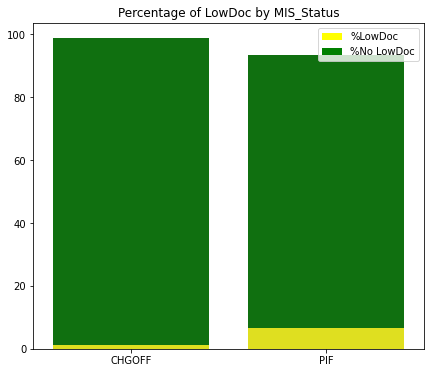

In [28]:
#Here are the visualize of percentage of LowDoc & MIS_Status using stacked bar
plt.figure(figsize=(7,6))
#plot 1 - backgroud - No
sns.barplot(x=doc['Status'], y=doc['No_Percent'], color='green')

#plot 2 - Yes
sns.barplot(x=doc['Status'], y=doc['Yes_Percent'], color='yellow')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%LowDoc', '%No LowDoc'], loc='best', ncol = 1, prop={'size':10})

plt.title('Percentage of LowDoc by MIS_Status')
# plt.savefig('JobInvolvement.png')
plt.show()

- Mostly for small business that has default loan (CHGOFF) didn't come from LowDoc. The percentage of LowDoc that CHGOFF only 1.25%
- For small business that succesfully paid in full (PIF) also didn't come from LowDoc

### `DisbursementGross`

In [29]:
df['DisbursementGross'].describe()

count    4.595060e+05
mean     1.719659e+05
std      2.749890e+05
min      4.000000e+03
25%      3.498300e+04
50%      7.550000e+04
75%      1.919928e+05
max      1.144632e+07
Name: DisbursementGross, dtype: float64

In [30]:
df['DisbursementGross'].groupby(df['MIS_Status']).median()

MIS_Status
CHGOFF    50400.0
P I F     89000.0
Name: DisbursementGross, dtype: float64

In [31]:
## Binning to gain more insight
bin_disGross=[3999.0, 75500.0, 11446325.0] #range kelompok (4000.0-75500.0, 75501.0-11446325.0)
label = ['low','high']
df['disGross_bin'] = pd.cut(df['DisbursementGross'], bins=bin_disGross, labels=label)

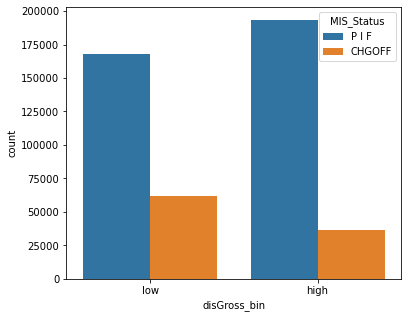

In [32]:
#countplot visualization
plt.figure(figsize=(6,5))
sns.countplot(df['disGross_bin'], hue=df['MIS_Status'])
plt.show()

In [33]:
((pd.crosstab(index=df['disGross_bin'], columns=df['MIS_Status'], normalize='columns'))*100).round(2)

## This code aims to determine which disbursed loans that experience a default loan

MIS_Status,CHGOFF,P I F
disGross_bin,,
low,63.0,46.46
high,37.0,53.54


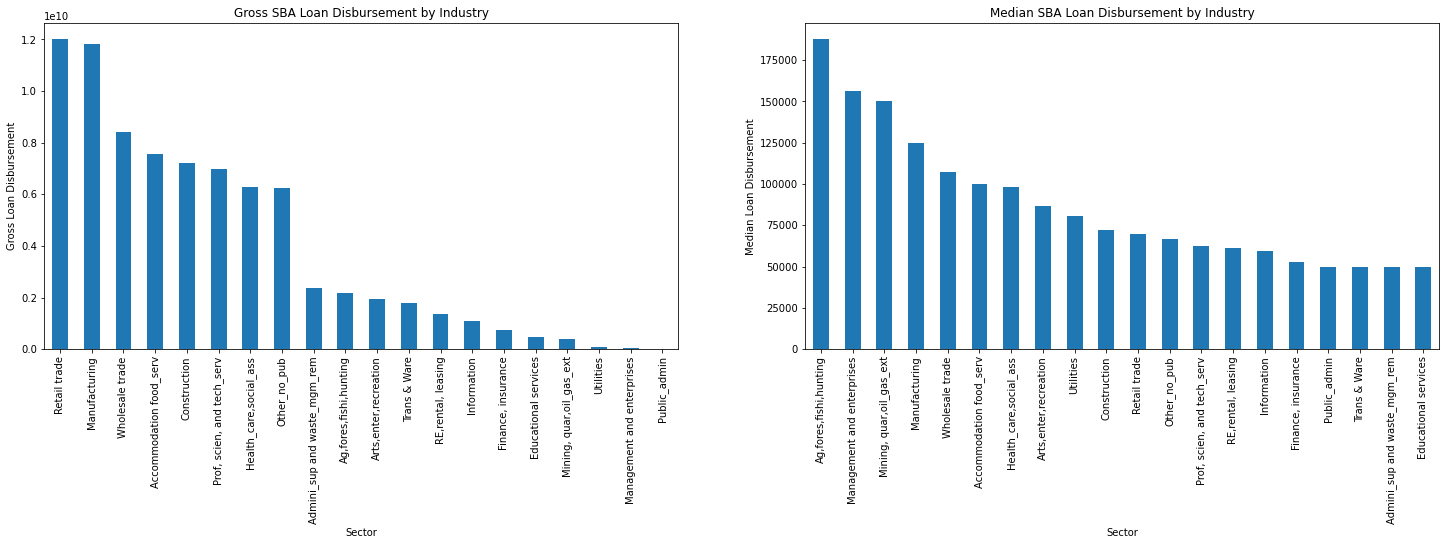

In [34]:
## Visualization
plt.figure(figsize=(25,6))

#Gross SBA Loan Disbursement by Industry
plt.subplot(1,2,1)
df['DisbursementGross'].groupby(df['sector']).sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Gross SBA Loan Disbursement by Industry')
plt.xlabel('Sector')
plt.ylabel('Gross Loan Disbursement')

#Median SBA Loan Disbursement by Industry
plt.subplot(1,2,2)
df['DisbursementGross'].groupby(df['sector']).median().sort_values(ascending=False).plot(kind='bar')
plt.title('Median SBA Loan Disbursement by Industry')
plt.xlabel('Sector')
plt.ylabel('Median Loan Disbursement')

plt.show()

- Median of DisbursementGross that CHGOFF was 50400.0 while DisbursementGross that PIF was 89000.0
- After binning,  CHGOFF with low DisbursementGross has higher percentage 63% rather than high DisbursementGross. Its means that mostly CHGOFF come from small business with low DisbursementGross
- Retail trade and Manufacturing has significantly loan disbursement compare to another sector
- Although Agriculture, forestry, fishing and hunting has total amount loan disbursement little compare to another, but they has highest median loan disbursement

### `GrAppv`
Gross amount of loan approved by bank

In [35]:
## This code aims to know the median of gross amount of loan approved by bank groupby sector
df['GrAppv'].groupby(df['sector']).median().sort_values(ascending=False)

sector
Ag,fores,ﬁshi,hunting           182000.0
Mining, quar,oil_gas_ext        139250.0
Management and enterprises      130500.0
Manufacturing                   100000.0
Wholesale trade                 100000.0
Health_care,social_ass           80000.0
Accommodation food_serv          75900.0
Arts,enter,recreation            70300.0
Utilities                        50500.0
Public_admin                     50000.0
Prof, scien, and tech_serv       50000.0
Other_no_pub                     50000.0
Retail trade                     50000.0
Information                      50000.0
Construction                     50000.0
RE,rental, leasing               45000.0
Finance, insurance               35000.0
Educational services             35000.0
Trans & Ware                     35000.0
Admini_sup and waste_mgm_rem     35000.0
Name: GrAppv, dtype: float64

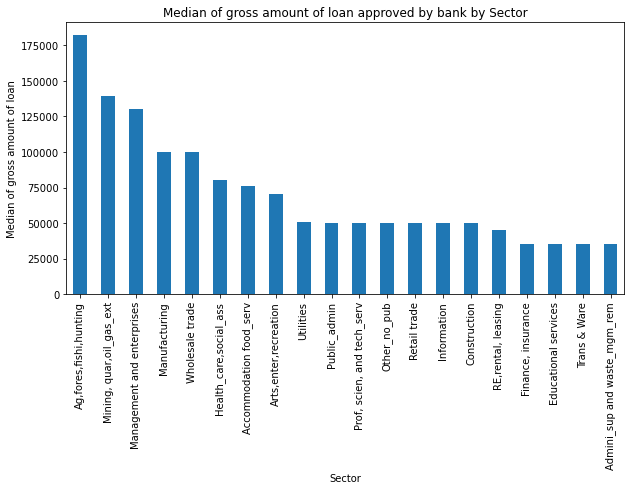

In [36]:
## Visualization
plt.figure(figsize=(10,5))
df['GrAppv'].groupby(df['sector']).median().sort_values(ascending=False).plot(kind='bar')
plt.title('Median of gross amount of loan approved by bank by Sector')
plt.xlabel('Sector')
plt.ylabel('Median of gross amount of loan')
plt.show()

- Agriculture, forestry, fishing and hunting has highest median of Gross amount of loan approved by bank around 182000.0, followed by Mining, quarrying, and oil and gas extraction

### `sector`

In [37]:
#sidetable
df.stb.freq(['sector'])
#This code aims to find out the percentage of sector 
#It appears that Retail trade has highest percentage around 17.70%

,sector,count,percent,cumulative_count,cumulative_percent
0,Retail trade,81344,17.702489,81344,17.702489
1,"Prof, scien, and tech_serv",49565,10.786584,130909,28.489073
2,Construction,49533,10.779620,180442,39.268693
3,Manufacturing,45802,9.967661,226244,49.236354
4,Other_no_pub,45019,9.797261,271263,59.033614
5,Wholesale trade,35040,7.625581,306303,66.659195
6,"Health_care,social_ass",34741,7.560511,341044,74.219706
7,Accommodation food_serv,34387,7.483471,375431,81.703177
8,Admini_sup and waste_mgm_rem,22150,4.820394,397581,86.523571
9,Trans & Ware,15471,3.366877,413052,89.890448


In [38]:
#crosstab between sector and MIS_Status
df_sector = pd.crosstab(index=df['sector'], columns=df['MIS_Status'])

#Default percentage
df_sector['%Percent'] = df_sector['CHGOFF']/(df_sector['CHGOFF']+df_sector['P I F'])
df_sector

MIS_Status,CHGOFF,P I F,%Percent
sector,,,
Accommodation food_serv,8586,25801,0.249687
Admini_sup and waste_mgm_rem,5489,16661,0.247810
"Ag,fores,ﬁshi,hunting",670,6993,0.087433
"Arts,enter,recreation",1955,7350,0.210102
Construction,12200,37333,0.246300
Educational services,1092,2938,0.270968
"Finance, insurance",2106,4265,0.330560
"Health_care,social_ass",3632,31109,0.104545
Information,1846,5543,0.249831


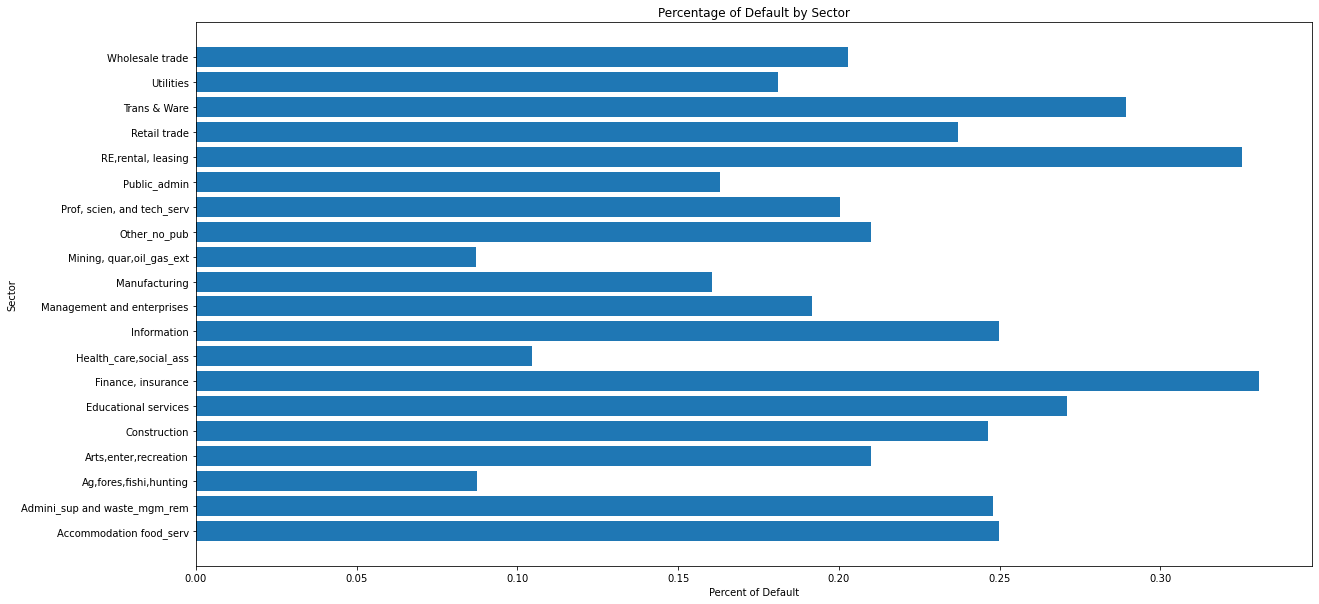

In [39]:
## Visualization
plt.figure(figsize=(20,10))
plt.barh(df_sector.index, df_sector['%Percent'])
plt.title('Percentage of Default by Sector')
plt.xlabel('Percent of Default')
plt.ylabel('Sector')
plt.show()

- Sector with highest number of loan was Retail trade with percentage around 17.70%, followed by Professional, scientific, and technical services and Construction with each percentage 10.78% and 10.77%
- Sector that has highest default was Finance and Insurance (33.05%), followed by Real estate and rental and leasing (32.52%) and Transportation and warehousing (28.94%)

### `ApprovalFY`

In [40]:
#sidetable
df.stb.freq(['ApprovalFY'])
#This code aims to find out the percentage of ApprovalFY 
#It appears that 2007 has highest percentage around 12.43%

,ApprovalFY,count,percent,cumulative_count,cumulative_percent
0,2007,57156,12.438575,57156,12.438575
1,2006,55800,12.143476,112956,24.582051
2,2005,47504,10.338059,160460,34.920110
3,2004,33220,7.229503,193680,42.149613
4,2008,29717,6.467163,223397,48.616775
5,2003,28596,6.223205,251993,54.839980
6,2002,19171,4.172089,271164,59.012069
7,2009,16483,3.587113,287647,62.599183
8,1995,16400,3.569050,304047,66.168233
9,2010,15935,3.467855,319982,69.636087


In [41]:
#crosstab between sector and MIS_Status
df_year = pd.crosstab(index=df['ApprovalFY'], columns=df['MIS_Status'])

#Default percentage
df_year['%Percent'] = df_year['CHGOFF']/(df_year['CHGOFF']+df_year['P I F'])
df_year

MIS_Status,CHGOFF,P I F,%Percent
ApprovalFY,,,
1984,0,1,0.000000
1987,298,386,0.435673
1988,399,414,0.490775
1989,371,5537,0.062796
1990,275,6319,0.041705
1991,172,6894,0.024342
1992,167,9380,0.017492
1993,187,10229,0.017953
1994,269,13562,0.019449


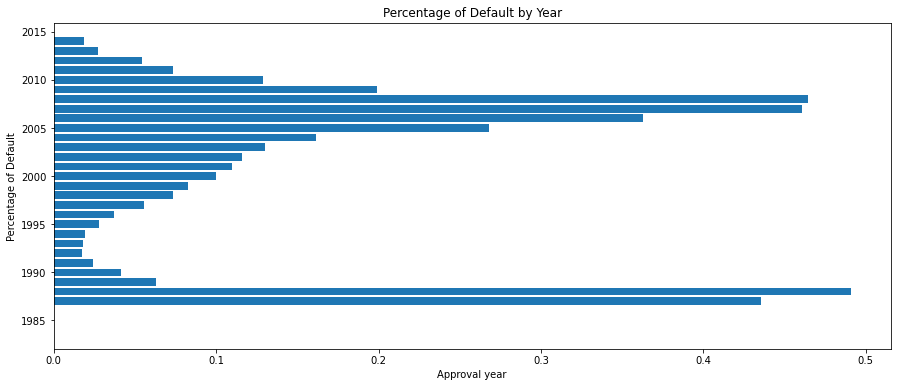

In [42]:
#Visualization
plt.figure(figsize=(15,6))
plt.barh(df_year.index, df_year['%Percent'])
plt.title('Percentage of Default by Year')
plt.xlabel('Approval year')
plt.ylabel('Percentage of Default')
plt.show()

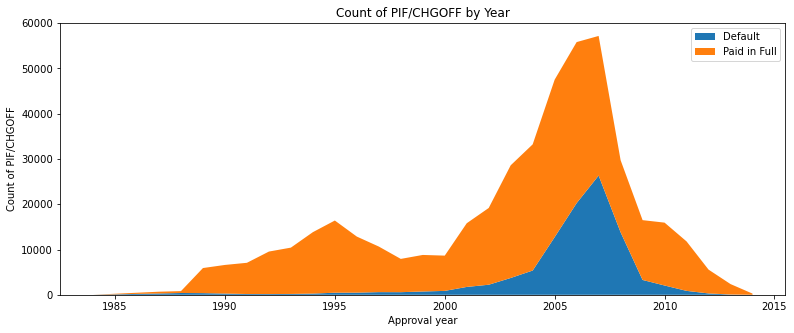

In [43]:
plt.figure(figsize=(13,5))
labels=['Default', 'Paid in Full']
plt.stackplot(df_year.index, [df_year['CHGOFF'], df_year['P I F']])
plt.title('Count of PIF/CHGOFF by Year')
plt.xlabel('Approval year')
plt.ylabel('Count of PIF/CHGOFF')
plt.legend(labels)
plt.show()

- Year with highest number of loan was 2007 (12.43%), followed by 2006(12.14%) and 2005(10.33%)
- Year where has highest Percentage of default loan was 1988 (49.07%), followed by 2008(46.42) and 2007(46.06)
- From the stackplot, it show that count of PIF/CHGOFF tend to increase by year

### `isFranchise`

In [45]:
#sidetable
df.stb.freq(['isFranchise'])
#This code aims to find out the percentage of isFranchise 
#It appears that No Franchise has highest percentage around 96.88%

,isFranchise,count,percent,cumulative_count,cumulative_percent
0,No Franchise,445170,96.880128,445170,96.880128
1,Franchise,14336,3.119872,459506,100.000000


In [51]:
((pd.crosstab(index=df['isFranchise'], columns=df['MIS_Status'], normalize='columns'))*100).round(2)

MIS_Status,CHGOFF,P I F
isFranchise,,
Franchise,2.29,3.35
No Franchise,97.71,96.65


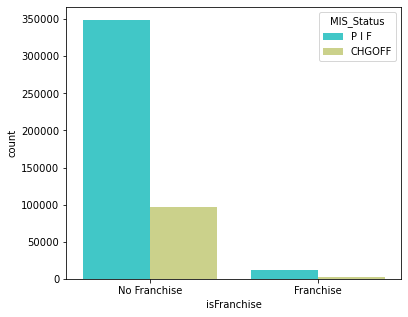

In [53]:
# Visualization
plt.figure(figsize=(6,5))
sns.countplot(df['isFranchise'], hue=df['MIS_Status'], palette='rainbow')
plt.show()

- Mostly small business that CHGOFF didn't come from Franchise

### `sameState`

In [55]:
#sidetable
df.stb.freq(['sameState'])
#This code aims to find out the percentage of sameState 
#It appears that different State(0) has highest percentage around 54.39%

,sameState,count,percent,cumulative_count,cumulative_percent
0,0,249951,54.39559,249951,54.39559
1,1,209555,45.60441,459506,100.00000


In [59]:
((pd.crosstab(index=df['sameState'], columns=df['MIS_Status'], normalize='columns'))*100).round(2)

MIS_Status,CHGOFF,P I F
sameState,,
0,75.44,48.65
1,24.56,51.35


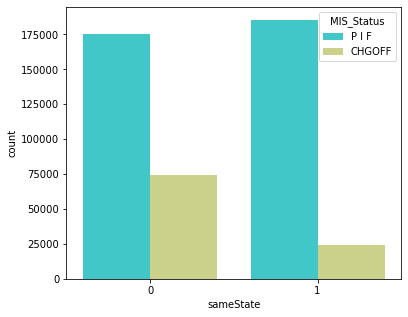

In [57]:
# Visualization
plt.figure(figsize=(6,5))
sns.countplot(df['sameState'], hue=df['MIS_Status'], palette='rainbow')
plt.show()

- Mostly small business that CHGOFF come from different State with percentage 75.44%

### `Portion`

In [10]:
# This code aims to know which sector that has high portion
df['Portion'].groupby(df['sector']).mean().sort_values(ascending=False)

sector
Ag,fores,ﬁshi,hunting           0.766747
Public_admin                    0.720636
Mining, quar,oil_gas_ext        0.717124
Manufacturing                   0.695555
Health_care,social_ass          0.692647
Arts,enter,recreation           0.683391
Management and enterprises      0.677500
Retail trade                    0.666809
Accommodation food_serv         0.666390
Other_no_pub                    0.665665
Wholesale trade                 0.664078
Utilities                       0.659342
Information                     0.625717
Prof, scien, and tech_serv      0.616916
Construction                    0.615456
Educational services            0.607020
RE,rental, leasing              0.606633
Admini_sup and waste_mgm_rem    0.588891
Trans & Ware                    0.586116
Finance, insurance              0.578442
Name: Portion, dtype: float64

- Agriculture, forestry, fishing and hunting has highest mean of Portion that SBA guarantee